# Feature Selection
If we build the ml model using all the features, it will result in overfitting and low-performance rate with increased computational complexity.

**Decision Tree usage for Feature Selection:** Decision tree can be used for both regression and classification tasks. It model decisions based on the features of the data and their outcomes.

How do decision trees play a role in feature selection?
* Decision trees select the best feature for splitting at each node based on information gain.
* Information gain measures the reduction in entropy (disorder) in a set of data points.
* Features with higher information gain are considered more important for splitting, thus aiding in feature selection.
* By recursively selecting features for splitting, decision trees inherently prioritize the most relevant features for the model.



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv("apple_quality.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [20]:
df = df.dropna()
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [21]:
#splitting the data into training and testing dataset
X = df.drop(columns=["Quality"])
Y = df["Quality"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=8, test_size=0.3)

**Usage of fit_transform and transform methods**

Suppose we are building a k-Nearest Neighbor model and we have to scale our features. The most common way to scale the features is through scikit-learn’s StandardScaler class.

Note:

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.
The magical formula which performs standardization:
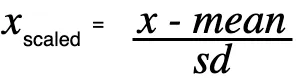

fit_transform()

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

transform()

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

In [22]:
#scaling the data

#fit_transform() and another one is transform(). Both are the methods of class sklearn.preprocessing.StandardScaler() and used almost together while scaling or standardizing our training and test data.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [23]:
#The DecisionTreeClassifier is trained with a maximum depth of 16 and a random state of 8, which helps control the randomness for reproducibility.

clf = DecisionTreeClassifier(max_depth=16, random_state=8)
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_test_scaled)

**Feature selection**

* The feature importances are calculated using the trained classifier, indicating the relative importance of each feature in the model’s decision-making process
* A threshold of 0.1 is set to select features with importance greater than this value, potentially reducing the number of features considered for the final model.
* The selected_features variable contains the names of the features that meet the importance threshold, which can be used for further analysis or model refinement.

In [24]:
importances = clf.feature_importances_

threshold = 0.1
selected_features = X.columns[importances > threshold]

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

In [25]:
#scaling the selected data

scaler = StandardScaler()
x_train_selected_scaled = scaler.fit_transform(x_train_selected)
x_test_selected_scaled = scaler.transform(x_test_selected)

In [26]:
#training the model with selected features

clf_selected = DecisionTreeClassifier(max_depth=16, random_state=8)
clf_selected.fit(x_train_selected_scaled, y_train)

DecisionTreeClassifier(max_depth=16, random_state=8)

The **accuracy score** represents the proportion of correctly classified instances out of the total instances in the test set.

The Model trained with the selected features will have higher accuracy score than the model trained with all the features.

In [27]:
y_predict_selected = clf_selected.predict(x_test_selected_scaled)

accuracy_all_features = accuracy_score(y_test, y_predict)
accuracy_selected_features = accuracy_score(y_test, y_predict_selected)

print(f"Accuracy of the Decision Tree model with all the features: {accuracy_all_features}")
print(f"Accuracy of the Decision Tree model with the selected features: {accuracy_selected_features}")

Accuracy of the Decision Tree model with all the features: 0.7983333333333333
Accuracy of the Decision Tree model with the selected features: 0.8241666666666667


In [28]:
print(selected_features)

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB
